Algorithms:<br>
1. Buy low sell high algorithm

	-allow window for no trading between first 30min and last 30 minutes of the trading day<br>
	-needs to set what price the stock was bought at<br>
	-needs to sell right before hitting this price<br>
	-needs to sell 10% above what the stock was bought at (rough guess)<br>
	-3 variables: buy price, stop loss price, profit price = buy price + 10%<br>
<br>
      -Sell stocks at EOD

In [13]:
from dotenv import load_dotenv
from datetime import datetime
load_dotenv()

True


# The Stock Class
Buys itself on init, deletes itself on sell


In [14]:
import matplotlib.pyplot as plt
    
class Stock:
    def __init__(self, stockDict):
        # set the input items as class members
        for key, value in stockDict.items():
            exec("self." + key + " = value")
            
        # reset stock history
        self.history = []
        self.historySmoothed = []
        
        # NONE
        self.adaptiveSellFloor = None
        self.buy()
        self.update(stockDict)
        
        
    def delete(self):
        del stockPortfolio[self.symbol]

    def runFilter(self, adaptionInertia=0.8):
        # LPF / moving average for Buy Floor
        # only apply on upswing
        #if self.bid_price_float > self.adaptiveSellFloor:
        #    self.adaptiveSellFloor = adaptionInertia*self.adaptiveSellFloor + self.bid_price_float * (1-adaptionInertia)
        
        # simplefloor
        self.adaptiveSellFloor = max(self.adaptiveSellFloor, self.bid_price_float*0.9)
        
        self.historySmoothed += [self.adaptiveSellFloor]
        
        
        
    def update(self, indict, adaptionInertia=0.8):
        
        for key, value in indict.items():
            exec("self." + key + " = value")
        print("updating " + self.symbol)
        self.bid_price_float = float(self.bid_price)
        self.history += [self.bid_price_float]
        
        # calculate the ratio to the buy time
        # ratioRelativeToBuy = float(self.bid_price) / float(self.buyPrice)
        
        # if the bid price falls below the floor, sell!
        if self.bid_price_float < self.adaptiveSellFloor:
            self.sell()
            
        self.runFilter()
            

    def graph(self):

        # Create the figure and axes
        fig, ax = plt.subplots()

        # Plot the first array
        ax.plot(self.historySmoothed, label='Smoothed')

        # Plot the second array
        ax.plot(self.history, label='Bid price')

        # Set the title
        ax.set_title('Stock History: ' + self.symbol)

        # Set the legend
        ax.legend()

        # Display the plot
        plt.show()

    
    def buy(self):
        self.buyPrice = float(self.ask_price)
        # set the adaptive sell floor to .9 of the buy price
        # only on the buy
        if self.adaptiveSellFloor is None:
            self.adaptiveSellFloor = 0.9 * self.buyPrice
        
        print("--------------------------------")
        print("Buying " + self.symbol)
        print("Bought at " + str(self.buyPrice))
        print("Adaptive Sell Foor " + str(self.adaptiveSellFloor))
        print("--------------------------------")
        pass

    def sell(self):
        print("--------------------------------")
        print("Selling " + self.symbol)
        print("Bought at " + str(self.buyPrice))
        print("Sold at " + str(self.bid_price))
        print("YOUR $$$: " + str(self.bid_price_float - self.buyPrice))
        print("--------------------------------")
        self.delete()
    
    # Tolerence Map

    #  
    #
    #   _________ buyPoint
    #
    #   _________ Adaptive sellFloor = LowPass Filter
    #
    #
    # AdaptionInertia is a parameter that lets us adjust the tracking speed of the LPF / Moving average\
            

In [15]:
stockPortfolio = {}

In [16]:
import requests

In [17]:
def BuyLowSellHigh(stockListOfDicts):
    
    for stockDict in stockListOfDicts:
        stockSymbol = stockDict["symbol"]
        heldStockSymbols = stockPortfolio.keys()
        
        # if we dont have the stock, buy it and add to stockPortfolio
        # stock will buy itself upon creation
        if stockSymbol not in heldStockSymbols:
            stockPortfolio[stockSymbol] = Stock(stockDict)
        # otherwise, run the update command, which may sell itself
        else:
            stockPortfolio[stockSymbol].update(stockDict)
            
        

mport robin_stocks.robinhood as rh<br>
mport robin_stocks.gemini as gem<br>
mport robin_stocks.tda as tda

In [18]:
import robin_stocks.robinhood as rs
import os

In [19]:
robin_user = os.environ.get("robinhood_username")
robin_pass = os.environ.get("robinhood_password")
rs.login(username=robin_user,
         password=robin_pass,
         expiresIn=86400,
         by_sms=True)

{'access_token': 'eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJkY3QiOjE2ODY1ODAwODgsImRldmljZV9oYXNoIjoiYmVkMzJhOTEwNGZmY2E3ZDQ2M2ZiMTJlMTNlODMxOWQiLCJleHAiOjE2ODY5MzkzNjIsImxldmVsMl9hY2Nlc3MiOmZhbHNlLCJtZXRhIjp7Im9pZCI6ImM4MlNIMFdaT3NhYk9YR1Ayc3hxY2ozNEZ4a3ZmbldSWkJLbEJqRlMiLCJvbiI6IlJvYmluaG9vZCJ9LCJvcHRpb25zIjpmYWxzZSwic2NvcGUiOiJpbnRlcm5hbCIsInNlcnZpY2VfcmVjb3JkcyI6W3siaGFsdGVkIjpmYWxzZSwic2VydmljZSI6Im51bW11c191cyIsInNoYXJkX2lkIjoyLCJzdGF0ZSI6ImF2YWlsYWJsZSJ9LHsiaGFsdGVkIjpmYWxzZSwic2VydmljZSI6ImJyb2tlYmFja191cyIsInNoYXJkX2lkIjoxMywic3RhdGUiOiJhdmFpbGFibGUifV0sInNybSI6eyJiX3VzIjp7ImhsIjpmYWxzZSwic2lkIjoxMywic3QiOiJhdiJ9LCJuX3VzIjp7ImhsIjpmYWxzZSwic2lkIjoyLCJzdCI6ImF2In19LCJ0b2tlbiI6Ijc2bTVha1diZWpXajUzTjB6clZjckRtOVNJSE1IOSIsInVzZXJfaWQiOiIyZWM2NzkzNC1iNzkyLTQ4YTAtYWVlNC1kYTMwZDY0MDU2YjciLCJ1c2VyX29yaWdpbiI6IlVTIn0.kD613MChtfruhhFBoyYIgcg6NCgYcAL5miGqEkJf42U2Qun4I-qQYazo13m_Y0joGOHTrFS0e5aQVAy_t61FCQqoeIyVGLS5Fnf3KnYW9AM7cZzLYTVQilBD6eV2gGF_3010m3O9WPl5EGVX_wm6GtdEFwEkDKVa-F6oCq5gTGm_y

Get the top 100 stocks

Print the symbols of the top 100 stocks

tick
--------------------------------
Buying TSLA
Bought at 246.98
Adaptive Sell Foor 222.28199999999998
--------------------------------
updating TSLA
--------------------------------
Buying AAPL
Bought at 181.86
Adaptive Sell Foor 163.674
--------------------------------
updating AAPL
--------------------------------
Buying AMZN
Bought at 124.96
Adaptive Sell Foor 112.464
--------------------------------
updating AMZN


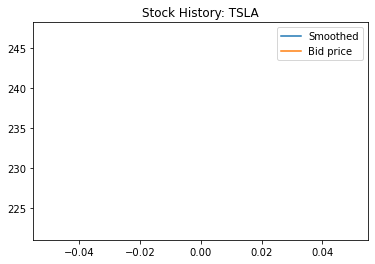

tick
updating TSLA
updating AAPL
updating AMZN


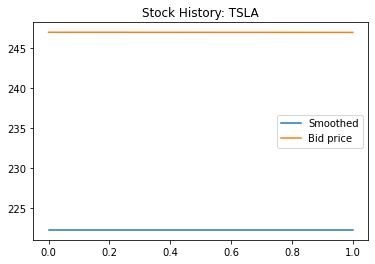

tick
updating TSLA
updating AAPL
updating AMZN


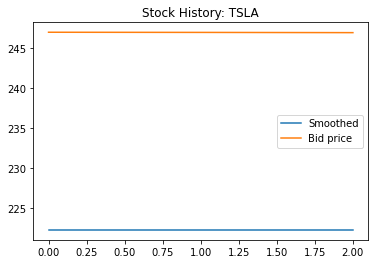

tick
updating TSLA
updating AAPL
updating AMZN


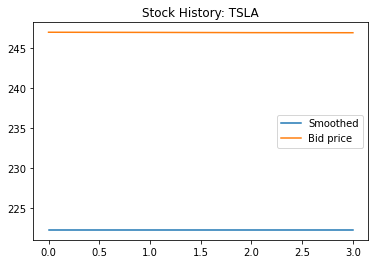

KeyboardInterrupt: 

In [20]:
import time
import json
#print(stockPortfolio)
while True:
    print("tick")
    # get top stocks
    top100listOfDicts = rs.get_top_100()
    
    BuyLowSellHigh(top100listOfDicts[:3])
    
    # get the 0th index in stockPortfolio
    for k, stock in stockPortfolio.items():
        stock.graph()
        break
    
    # every 5 seconds
    time.sleep(2)

In [22]:
rs.get_all_open_crypto_orders() # gets all cypto orders from Robinhood


[]

In [ ]:
rs.logout()